In [2]:
clear all

In [3]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from func_sdh_oe import *
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [18, 12]
matplotlib.rc('axes',edgecolor='none')
%matplotlib inline

dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/lamaclima_wp4/wbgt_labour/'
   
def get_data(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl2['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl3['wbgtod_havenith-2024_400W'].mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'/cesm/12h/'+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl2['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl3['wbgtod_havenith-2024_400W'].mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod'][:,:,:].time
        da_2['time']=check['wbgtod'][:,:,:].time
        da_3['time']=check['wbgtod'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W']
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W']
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W']

        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_havenith-2024_400W'][:,:,:].time
        da_2['time']=check['wbgtod_havenith-2024_400W'][:,:,:].time
        da_3['time']=check['wbgtod_havenith-2024_400W'][:,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
def get_data_esi(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='ecearth':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return (ds_cesm_presctl1['wbgtod'].mean('time')+ds_cesm_presctl2['wbgtod'].mean('time')+ds_cesm_presctl3['wbgtod'].mean('time'))/3
    else:
        if esm!='ecearth':
            da_1=ds_cesm_presctl1['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_2=ds_cesm_presctl2['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_3=ds_cesm_presctl3['wbgtod'].sel(time=slice('1985-01-01', '2014-01-01'))
            check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod'][:348,:,:].time
            da_2['time']=check['wbgtod'][:348,:,:].time
            da_3['time']=check['wbgtod'][:348,:,:].time
        else:
            da_1=ds_cesm_presctl1['wbgtod'][:348,:,:]
            da_2=ds_cesm_presctl2['wbgtod'][:348,:,:]
            da_3=ds_cesm_presctl3['wbgtod'][:348,:,:]
            check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod'][:348,:,:].time
            da_2['time']=check['wbgtod'][:348,:,:].time
            da_3['time']=check['wbgtod'][:348,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        sum2=sum1.values+da_3.mean('time').values
        sum1[:]=sum2
        return (sum1)/3
def get_data_esi_labour(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='ecearth':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        return 100*(ds_cesm_presctl1['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl2['wbgtod_havenith-2024_400W'].mean('time')+ds_cesm_presctl3['wbgtod_havenith-2024_400W'].mean('time'))/3
    else:
        if esm!='ecearth':
            da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
            check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
            da_2['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
            da_3['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
        else:
            da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'][:348,:,:]
            da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'][:348,:,:]
            #da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'][:348,:,:]
            check=xr.open_dataset(dir+esm+'/12h/'+esm+'/esi_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
            da_1['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
            da_2['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
            #da_3['time']=check['wbgtod_havenith-2024_400W'][:348,:,:].time
        sum1=da_1.mean('time')+da_2.mean('time')
        #sum2=sum1.values+da_3.mean('time').values
        #sum1[:]=sum2
        return 100*(sum1)/2


--------------------------------------------------------------------------
Open MPI failed an OFI Libfabric library call (fi_endpoint).  This is highly
unusual; your job may behave unpredictably (and/or abort) after this.

  Local host: node5401
  Location: mtl_ofi_component.c:513
  Error: Invalid argument (22)
--------------------------------------------------------------------------


node5401.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5401.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5401.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5401.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted


In [4]:
esm='cesm'
case='histctl'
ds_cesm_presctl1=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
ds_cesm_presctl2=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
ds_cesm_presctl3=xr.open_dataset(dir+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
da_1=ds_cesm_presctl1['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
da_2=ds_cesm_presctl2['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
da_3=ds_cesm_presctl3['wbgtod_iso_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
da_1['time']=check['wbgtod_iso_400W'].time
da_2['time']=check['wbgtod_iso_400W'].time
da_3['time']=check['wbgtod_iso_400W'].time
da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')

sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
sum2=sum1.values+da_3_seas.mean('time').values
sum1[:]=sum2

In [5]:


def get_data_DJF(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl1['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl2['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl3['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl1['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl2['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][0:2,:,:],ds_cesm_presctl3['wbgtod_havenith-2024_400W'][11::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][12::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][13::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod'].time
        da_2['time']=check['wbgtod'].time
        da_3['time']=check['wbgtod'].time
        da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
        da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
        da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W']
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W']
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W']

        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_havenith-2024_400W'].time
        da_2['time']=check['wbgtod_havenith-2024_400W'].time
        da_3['time']=check['wbgtod_havenith-2024_400W'].time
        da_1_seas = xr.concat([da_1[0:2,:,:],da_1[11::12], da_1[12::12], da_1[13::12]], dim='time')
        da_2_seas = xr.concat([da_2[0:2,:,:],da_2[11::12], da_2[12::12], da_2[13::12]], dim='time')
        da_3_seas = xr.concat([da_3[0:2,:,:],da_3[11::12], da_3[12::12], da_3[13::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    
    
def get_data_MAM(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][2::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][3::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][4::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod'].time
        da_2['time']=check['wbgtod'].time
        da_3['time']=check['wbgtod'].time
        da_1_seas = xr.concat([da_1[2::12], da_1[3::12], da_1[4::12]], dim='time')
        da_2_seas = xr.concat([da_2[2::12], da_2[3::12], da_2[4::12]], dim='time')
        da_3_seas = xr.concat([da_3[2::12], da_3[3::12], da_3[4::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W']
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W']
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W']

        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_havenith-2024_400W'].time
        da_2['time']=check['wbgtod_havenith-2024_400W'].time
        da_3['time']=check['wbgtod_havenith-2024_400W'].time
        da_1_seas = xr.concat([da_1[2::12], da_1[3::12], da_1[4::12]], dim='time')
        da_2_seas = xr.concat([da_2[2::12], da_2[3::12], da_2[4::12]], dim='time')
        da_3_seas = xr.concat([da_3[2::12], da_3[3::12], da_3[4::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    

def get_data_JJA(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+'/cesm/12h/'+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][6::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][5::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][7::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod'].time
        da_2['time']=check['wbgtod'].time
        da_3['time']=check['wbgtod'].time
        da_1_seas = xr.concat([da_1[6::12], da_1[5::12], da_1[7::12]], dim='time')
        da_2_seas = xr.concat([da_2[6::12], da_2[5::12], da_2[7::12]], dim='time')
        da_3_seas = xr.concat([da_3[6::12], da_3[5::12], da_3[7::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W']
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W']
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W']

        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_havenith-2024_400W'].time
        da_2['time']=check['wbgtod_havenith-2024_400W'].time
        da_3['time']=check['wbgtod_havenith-2024_400W'].time
        da_1_seas = xr.concat([da_1[5::12], da_1[6::12], da_1[7::12]], dim='time')
        da_2_seas = xr.concat([da_2[5::12], da_2[6::12], da_2[7::12]], dim='time')
        da_3_seas = xr.concat([da_3[5::12], da_3[6::12], da_3[7::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    
def get_data_SON(esm,case):
    ds_cesm_presctl1=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i1_local-12h.nc')
    ds_cesm_presctl2=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i2_local-12h.nc')
    ds_cesm_presctl3=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_'+case+'_i3_local-12h.nc')
    if case !='histctl' and esm!='cesm':
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case !='histctl' and esm=='cesm': 
        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        ds_cesm_presctl1['time']=check.time
        ds_cesm_presctl2['time']=check.time
        ds_cesm_presctl3['time']=check.time
        ds_cesm_presctl1_seas = xr.concat([ds_cesm_presctl1['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl1['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        ds_cesm_presctl2_seas = xr.concat([ds_cesm_presctl2['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl2['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        ds_cesm_presctl3_seas = xr.concat([ds_cesm_presctl3['wbgtod_havenith-2024_400W'][8::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][9::12], ds_cesm_presctl3['wbgtod_havenith-2024_400W'][10::12]], dim='time')
        return 100*(ds_cesm_presctl1_seas.mean('time')+ds_cesm_presctl2_seas.mean('time')+ds_cesm_presctl3_seas.mean('time'))/3
    elif case =='histctl' and esm !='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W'].sel(time=slice('1985-01-01', '2014-01-01'))

        check=xr.open_dataset(dir+'cesm/wbgt-liljegren_work_mon_cesm_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod'].time
        da_2['time']=check['wbgtod'].time
        da_3['time']=check['wbgtod'].time
        da_1_seas = xr.concat([da_1[8::12], da_1[9::12], da_1[10::12]], dim='time')
        da_2_seas = xr.concat([da_2[8::12], da_2[9::12], da_2[10::12]], dim='time')
        da_3_seas = xr.concat([da_3[8::12], da_3[9::12], da_3[10::12]], dim='time')

        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    elif case =='histctl' and esm =='ecearth':
        da_1=ds_cesm_presctl1['wbgtod_havenith-2024_400W']
        da_2=ds_cesm_presctl2['wbgtod_havenith-2024_400W']
        da_3=ds_cesm_presctl3['wbgtod_havenith-2024_400W']

        check=xr.open_dataset(dir+esm+'/12h/'+esm+'/wbgt-liljegren_work_mon_'+esm+'_futctl_i1_local-12h.nc')
        da_1['time']=check['wbgtod_havenith-2024_400W'].time
        da_2['time']=check['wbgtod_havenith-2024_400W'].time
        da_3['time']=check['wbgtod_havenith-2024_400W'].time
        da_1_seas = xr.concat([da_1[8::12], da_1[9::12], da_1[10::12]], dim='time')
        da_2_seas = xr.concat([da_2[8::12], da_2[9::12], da_2[10::12]], dim='time')
        da_3_seas = xr.concat([da_3[8::12], da_3[9::12], da_3[10::12]], dim='time')
        sum1=da_1_seas.mean('time')+da_2_seas.mean('time')
        sum2=sum1.values+da_3_seas.mean('time').values
        sum1[:]=sum2
        return 100*(sum1)/3
    


<Figure size 432x288 with 0 Axes>

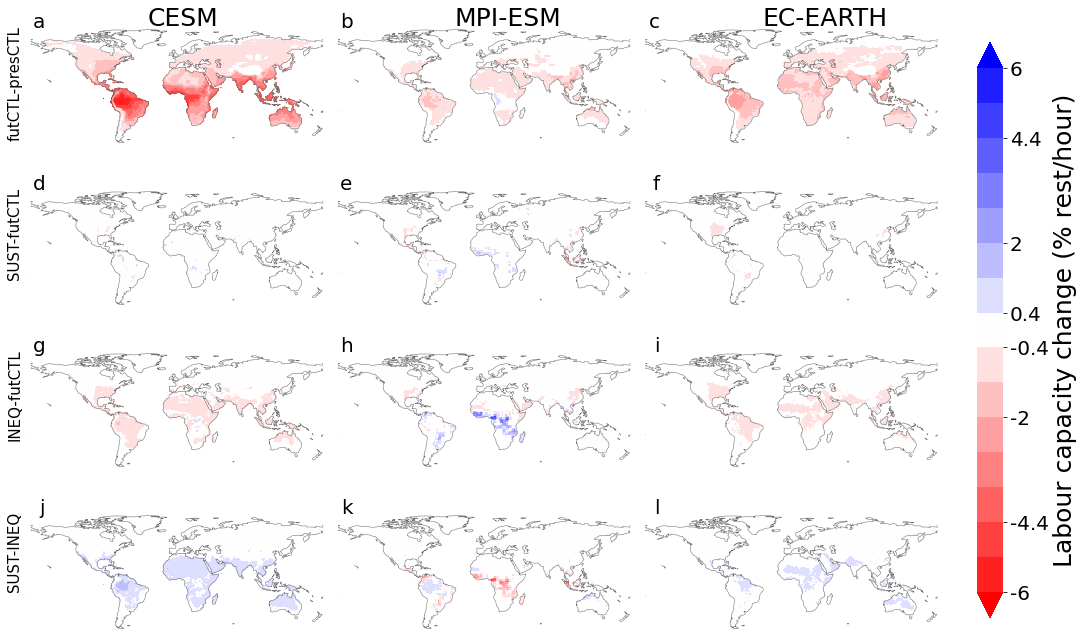

In [5]:

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (% rest/hour)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data(esm,'futctl')-get_data(esm,'histctl')
        da_delta_ens_all_lcc =  get_data(esm,'futsust')-get_data(esm,'futineq')
        da_delta_ens_all_sust =  get_data(esm,'futsust')-get_data(esm,'futctl')
        da_delta_ens_all_ineq =  get_data(esm,'futineq')-get_data(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


In [9]:

# Assuming da_delta_ens_all_ineq is your DataArray
da = da_delta_ens_all_ineq
#.mean(['time','ens_member'])

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

Value: nan, Latitude: -81.7536351418384, Longitude: 40.078125
Value: nan, Latitude: -81.7536351418384, Longitude: 38.671875
Value: nan, Latitude: -81.7536351418384, Longitude: 37.265625
Value: nan, Latitude: -81.7536351418384, Longitude: 37.96875
Value: nan, Latitude: -81.7536351418384, Longitude: 36.5625
Value: nan, Latitude: -81.7536351418384, Longitude: 39.375
Value: nan, Latitude: -81.7536351418384, Longitude: 42.1875
Value: nan, Latitude: -81.7536351418384, Longitude: 40.78125
Value: nan, Latitude: -81.7536351418384, Longitude: 41.484375
Value: nan, Latitude: -89.4628215685774, Longitude: 180.0


<xarray.DataArray 'wbgtod_havenith-2024_400W' (lat: 256, lon: 512)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46


<Figure size 432x288 with 0 Axes>

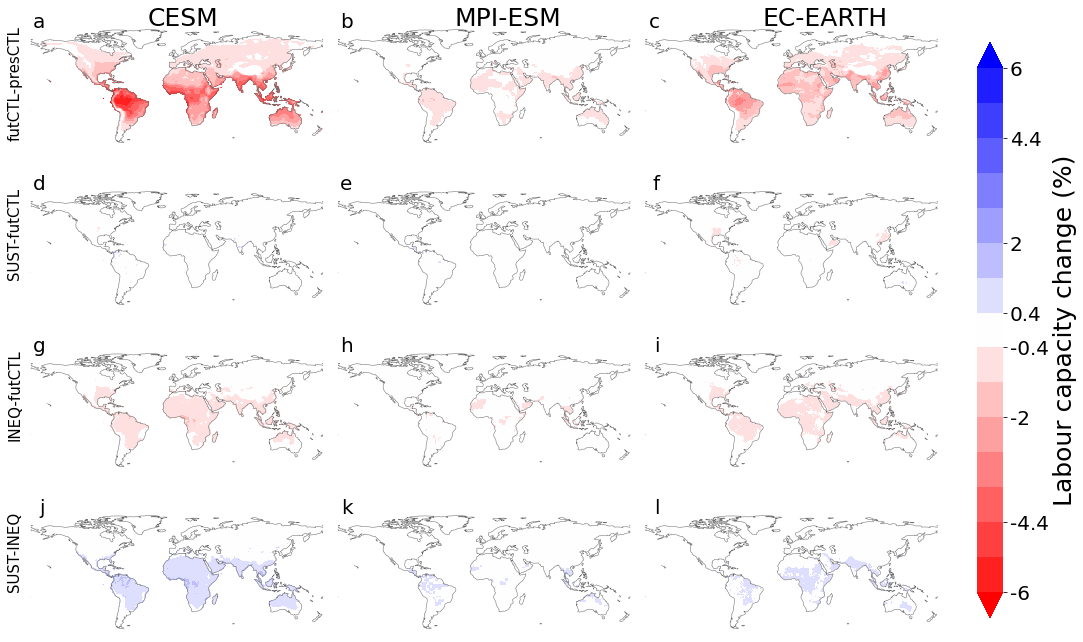

In [6]:

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (%)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi_labour(esm,'futctl')-get_data_esi_labour(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi_labour(esm,'futsust')-get_data_esi_labour(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi_labour(esm,'futineq')-get_data_esi_labour(esm,'futctl')
        print(da_delta_ens_all_ctl)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            da1=da
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


<xarray.DataArray 'wbgtod' (lat: 256, lon: 512)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 177.9 178.6 179.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46


<Figure size 432x288 with 0 Axes>

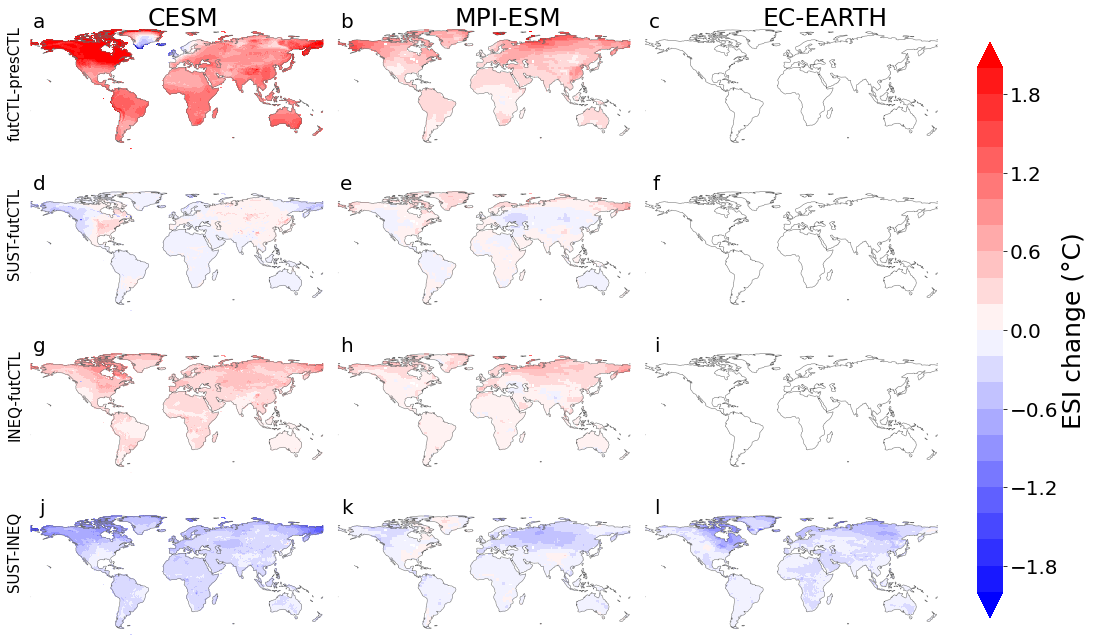

In [11]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'ESI change (°C)'

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10), )
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
        da_list1=da_list
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = get_data_esi(esm,'futctl')-get_data_esi(esm,'histctl')
        da_delta_ens_all_lcc =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futineq')
        da_delta_ens_all_sust =  get_data_esi(esm,'futsust')-get_data_esi(esm,'futctl')
        da_delta_ens_all_ineq =  get_data_esi(esm,'futineq')-get_data_esi(esm,'futctl')
        print(da_delta_ens_all_ctl)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        #da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            da1=da
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1.1, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('labour_plot.png')


<Figure size 432x288 with 0 Axes>

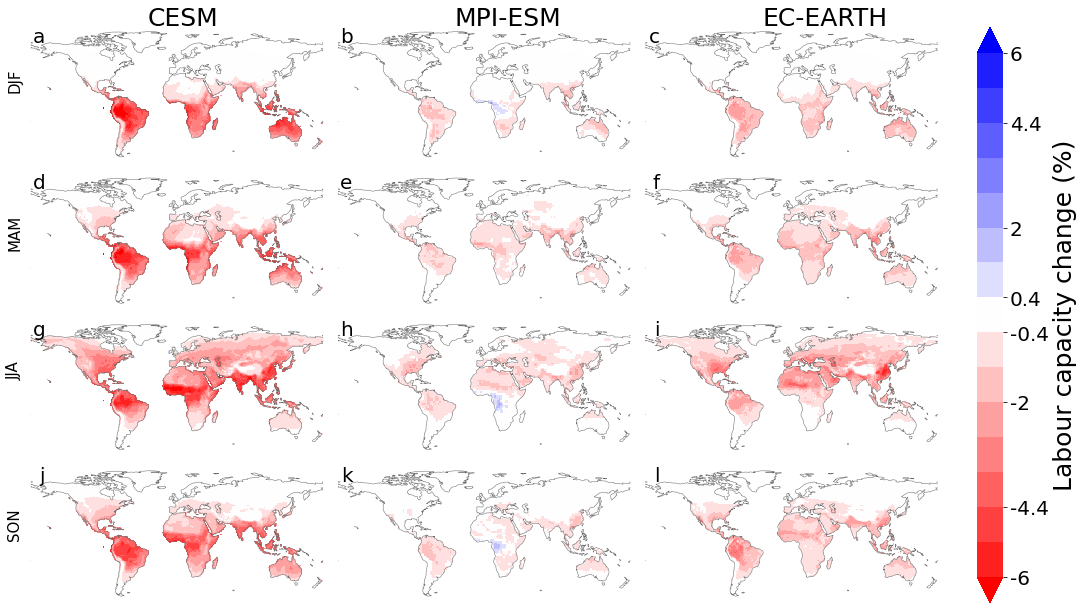

In [7]:

mpl.rc('axes',edgecolor='none')

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity change (%)'

title = 'Near-surface temperature change (DJF)'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futctl')-get_data_JJA(esm,'histctl')
        da_delta_DJF =  get_data_DJF(esm,'futctl')-get_data_DJF(esm,'histctl')
        da_delta_MAM =  get_data_MAM(esm,'futctl')-get_data_MAM(esm,'histctl')
        da_delta_SON =  get_data_SON(esm,'futctl')-get_data_SON(esm,'histctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [8]:
da_delta = get_data_JJA('cesm', 'futctl') - get_data_JJA('cesm', 'histctl')

# Filter the DataArray for the specified latitude range
lat_limit = (da_delta['lat'] >= -60) & (da_delta['lat'] <= 70)
filtered_da = da_delta.where(lat_limit, drop=True)

# Flatten the filtered DataArray to 1D
flattened_da = filtered_da.values.flatten()

# Find the indices of the 10 largest values in the filtered DataArray
largest_indices = np.argpartition(flattened_da, 10)[10:]

# Convert the 1D indices back to 2D indices in the filtered DataArray
lat_indices, lon_indices = np.unravel_index(largest_indices, filtered_da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = filtered_da['lat'].values[lat_indices]
longitudes = filtered_da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")


Value: -6.413506443897617, Latitude: 11.780104637145996, Longitude: 0.0
Value: -6.4102600730396375, Latitude: 11.780104637145996, Longitude: -1.25
Value: -6.404952480064011, Latitude: 11.780104637145996, Longitude: 3.75
Value: -6.382855359355929, Latitude: 12.722513198852539, Longitude: 3.75
Value: -6.400746708990994, Latitude: 22.146596908569336, Longitude: 90.0
Value: -6.3304885170824505, Latitude: 13.664921760559082, Longitude: 1.25
Value: -6.338141200332117, Latitude: 11.780104637145996, Longitude: -5.0
Value: -6.390838139630432, Latitude: 11.780104637145996, Longitude: -3.75
Value: -6.392596190848799, Latitude: 12.722513198852539, Longitude: 2.5
Value: -6.335022200240438, Latitude: 13.664921760559082, Longitude: 2.5


In [9]:
# Assuming get_data_JJA is defined and returns an xarray DataArray
da_delta_JJA = get_data_JJA('mpiesm', 'futctl') - get_data_JJA('mpiesm', 'histctl')

# Filter the DataArray for the specified latitude range
lat_limit = (da_delta_JJA['lat'] >= -60) & (da_delta_JJA['lat'] <= 70)
filtered_da = da_delta_JJA.where(lat_limit, drop=True)

# Flatten the filtered DataArray to 1D
flattened_da = filtered_da.values.flatten()

# Find the indices of the 10 largest values in the filtered DataArray
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices in the filtered DataArray
lat_indices, lon_indices = np.unravel_index(largest_indices, filtered_da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = filtered_da['lat'].values[lat_indices]
longitudes = filtered_da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")


Value: 1.610401930017943, Latitude: -6.5284094014799905, Longitude: 20.625
Value: 1.8277085317470352, Latitude: -2.797889876956741, Longitude: 11.25
Value: 1.9125341964342653, Latitude: -2.797889876956741, Longitude: 18.75
Value: 2.10328232428472, Latitude: -4.663149706177884, Longitude: 18.75
Value: 1.637295746985174, Latitude: -4.663149706177884, Longitude: 20.625
Value: 1.7847855143509719, Latitude: -6.5284094014799905, Longitude: 16.875
Value: 1.9929960829481388, Latitude: -6.5284094014799905, Longitude: 18.75
Value: 1.631205052487445, Latitude: -8.393668907692383, Longitude: 15.0
Value: 1.700505072621084, Latitude: -8.393668907692383, Longitude: 16.875
Value: 1.7981578078720162, Latitude: -4.663149706177884, Longitude: 16.875


<Figure size 432x288 with 0 Axes>

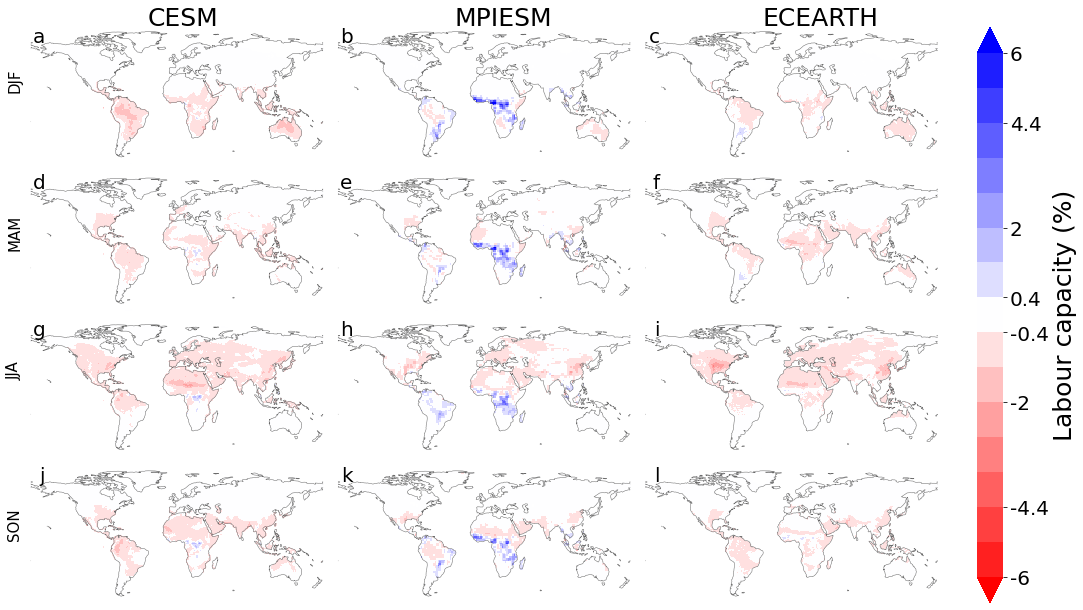

In [10]:

mpl.rc('axes',edgecolor='none')

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futineq')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futineq')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futineq')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futineq')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [11]:
# Assuming get_data_JJA is defined and returns an xarray DataArray
da_delta_JJA = get_data_JJA('mpiesm', 'futineq') - get_data_JJA('mpiesm', 'futctl')

# Filter the DataArray for the specified latitude range
lat_limit = (da_delta_JJA['lat'] >= -60) & (da_delta_JJA['lat'] <= 70)
filtered_da = da_delta_JJA.where(lat_limit, drop=True)

# Flatten the filtered DataArray to 1D
flattened_da = filtered_da.values.flatten()

# Find the indices of the 10 largest values in the filtered DataArray
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices in the filtered DataArray
lat_indices, lon_indices = np.unravel_index(largest_indices, filtered_da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = filtered_da['lat'].values[lat_indices]
longitudes = filtered_da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")


Value: 2.940792984563444, Latitude: -4.663149706177884, Longitude: 28.125
Value: 2.955644872695075, Latitude: -4.663149706177884, Longitude: 22.5
Value: 3.2332926129271584, Latitude: 2.797889876956741, Longitude: 28.125
Value: 3.294329940922907, Latitude: -2.797889876956741, Longitude: 22.5
Value: 3.419442709159455, Latitude: -4.663149706177884, Longitude: 24.375
Value: 3.45170736850433, Latitude: -0.932629967837991, Longitude: 24.375
Value: 3.535433844575252, Latitude: -2.797889876956741, Longitude: 26.25
Value: 3.718435201729285, Latitude: -2.797889876956741, Longitude: 24.375
Value: 3.960857881111849, Latitude: -0.932629967837991, Longitude: 22.5
Value: 4.062117254229449, Latitude: -4.663149706177884, Longitude: 26.25


<Figure size 432x288 with 0 Axes>

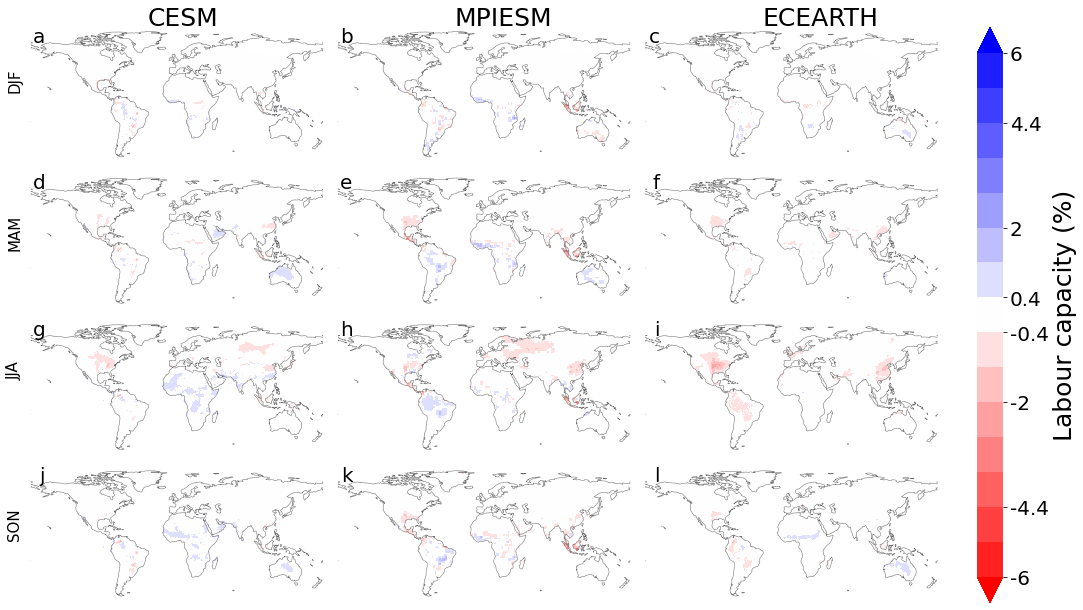

In [12]:

mpl.rc('axes',edgecolor='none')

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futctl')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futctl')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futctl')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futctl')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [13]:
# Assuming get_data_JJA is defined and returns an xarray DataArray
da_delta_JJA = get_data_JJA('ecearth', 'futsust') - get_data_JJA('ecearth', 'futctl')

# Filter the DataArray for the specified latitude range
lat_limit = (da_delta_JJA['lat'] >= -60) & (da_delta_JJA['lat'] <= 70)
filtered_da = da_delta_JJA.where(lat_limit, drop=True)

# Flatten the filtered DataArray to 1D
flattened_da = filtered_da.values.flatten()

# Find the indices of the 10 largest values in the filtered DataArray
largest_indices = np.argpartition(flattened_da, 10)[10:]

# Convert the 1D indices back to 2D indices in the filtered DataArray
lat_indices, lon_indices = np.unravel_index(largest_indices, filtered_da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = filtered_da['lat'].values[lat_indices]
longitudes = filtered_da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")


Value: -2.4406299373844007, Latitude: 38.2455282337738, Longitude: -94.921875
Value: -2.3269466586845766, Latitude: 38.9472804370071, Longitude: -92.109375
Value: -2.353602568636859, Latitude: 36.8420237038942, Longitude: -97.03125
Value: -2.36055395424313, Latitude: 35.4385190210863, Longitude: -96.328125
Value: -2.382941941042617, Latitude: 38.2455282337738, Longitude: -95.625
Value: -2.424274505030553, Latitude: 36.8420237038942, Longitude: -94.21875
Value: -2.306808811296875, Latitude: 35.4385190210863, Longitude: -97.03125
Value: -1.890275290239785, Latitude: 40.3507847105177, Longitude: -94.21875
Value: -2.0160041679210394, Latitude: 36.8420237038942, Longitude: -92.8125
Value: -2.203772087226554, Latitude: 36.8420237038942, Longitude: -93.515625


<Figure size 432x288 with 0 Axes>

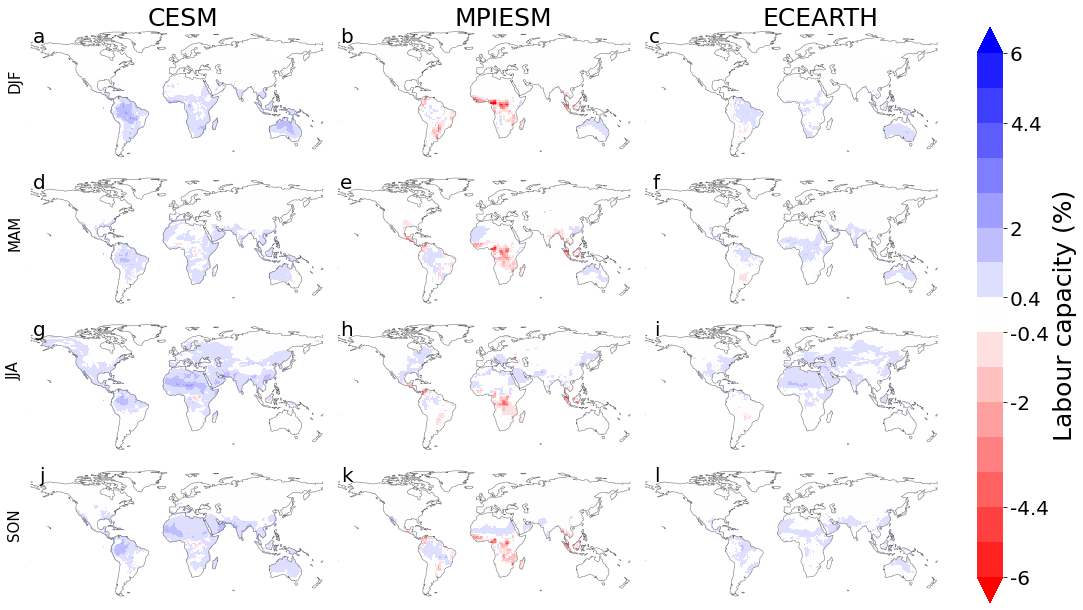

In [14]:

mpl.rc('axes',edgecolor='none')

vmin = -6
vmax = 6
nsteps = 15
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr_r'
# define colorbar label (including unit!)
cbar_label = 'Labour capacity (%)'


k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18, 10),)
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        da_delta_JJA = get_data_JJA(esm,'futsust')-get_data_JJA(esm,'futineq')
        da_delta_DJF =  get_data_DJF(esm,'futsust')-get_data_DJF(esm,'futineq')
        da_delta_MAM =  get_data_MAM(esm,'futsust')-get_data_MAM(esm,'futineq')
        da_delta_SON =  get_data_SON(esm,'futsust')-get_data_SON(esm,'futineq')
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask=da_mask.mean('time')
        da["lon"]=(da['lon'] + 360) % 360
        da=da.sortby("lon")
        if esm=="mpiesm":
            da["lat"]=da_mask["lat"]
            da["lon"]=da_mask["lon"]
        da=da.where(da_mask)
        h=da.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            ax_2=ax
            ax.text(0.4,1.15,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
cbar.set_ticks([-6,-4.4,-2,-0.4,0.4,2,4.4,6])
cbar.set_ticklabels(["-6","-4.4","-2","-0.4","0.4","2","4.4","6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


/tmp/ipykernel_1668207/3488716362.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


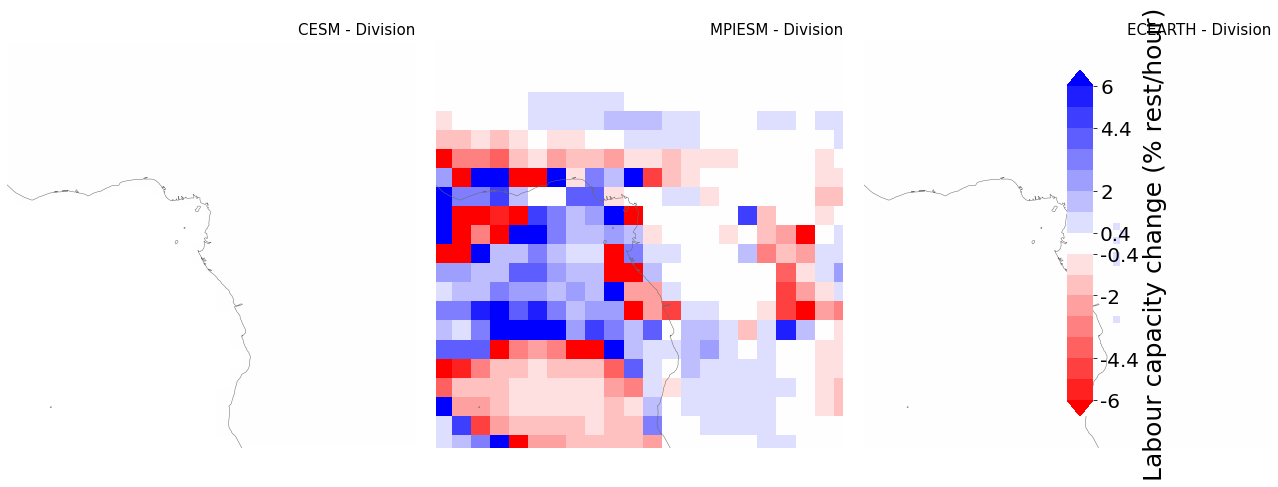

Average for CESM (Lat +20 to -20): -0.03
Average for MPIESM (Lat +20 to -20): -0.08
Average for ECEARTH (Lat +20 to -20): 0.04


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

vmin = -6
vmax = 6
nsteps = 15
cmap = 'bwr_r'
cbar_label = 'Labour capacity change (% rest/hour)'

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Define limits for Central Africa
lat_limits = (+20, -20)
#lon_limits = (-10, 30)

# Store averages
averages = {}

for k, esm in enumerate(['cesm', 'mpiesm', 'ecearth']):
    # Calculate the necessary datasets
    da_delta_ens_all_ctl = get_data(esm, 'futctl') - get_data(esm, 'histctl')
    da_delta_ens_all_sust = get_data(esm, 'futsust') - get_data(esm, 'futctl')
    
    # Perform the division
    da_div = da_delta_ens_all_sust / da_delta_ens_all_ctl
    
    # Restrict to Central Africa
    da_div = da_div.where((da_div['lat'] <= lat_limits[0]) & (da_div['lat'] >= lat_limits[1]))    
    # Plot the division result
    ax = axes[k]
    h = da_div.plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, levels=np.arange(vmin, vmax + 0.2, (vmax - vmin) / nsteps), 
                    extend='both', add_colorbar=False, add_labels=False)
    ax.set_extent(lon_limits + lat_limits[::-1], ccrs.PlateCarree())
    ax.coastlines(color='dimgray', linewidth=0.5)
    ax.set_title(f"{esm.upper()} - Division", loc='right', fontsize=15)

    # Compute the average over the specified latitude range, ignoring NaNs
    average_value = da_div.mean(dim='lat', skipna=True).mean(dim='lon', skipna=True)  # Mean over latitudes and then over longitudes
    averages[esm] = average_value.values.item()  # Store the average for each esm

# Colorbar configuration
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
cbar.set_ticks([-6, -4.4, -2, -0.4, 0.4, 2, 4.4, 6])
cbar.set_ticklabels(["-6", "-4.4", "-2", "-0.4", "0.4", "2", "4.4", "6"])
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('labour_division_plot.png')
plt.show()

# Print the averages
for esm, avg in averages.items():
    print(f"Average for {esm.upper()} (Lat +20 to -20): {avg:.2f}")
